In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a 2022WI folder and put all the files under A3 folder, then '2022WI/A3'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'EECS545_Final_Project'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['music_genre.csv', 'transfer_learning_music', 'kapre', 'spotify_downloader_test.ipynb', 'classical_ml.py', 'data_merged.csv', 'data_merged_quartile.csv', 'NN_data.ipynb', 'NN.py', 'cleaned_music.csv', 'DL_music.ipynb', 'classical_ml.ipynb']


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import metrics
import numpy as np
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.manifold import Isomap, TSNE, MDS
import random
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import warnings 
import math
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, label_ranking_loss

warnings.simplefilter("ignore")

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import backend as K

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/EECS545_Final_Project/cleaned_music.csv")
data

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,music_genre_Anime,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock,popularity
0,0.01270,0.622,218293.0,0.890,0.950000,0.124,-7.043,0.0300,115.002,0.531,...,0,0,0,0,1,0,0,0,0,31.0
1,0.00306,0.620,215613.0,0.755,0.011800,0.534,-4.617,0.0345,127.994,0.333,...,0,0,0,0,1,0,0,0,0,28.0
2,0.02540,0.774,166875.0,0.700,0.002530,0.157,-4.498,0.2390,128.014,0.270,...,0,0,0,0,1,0,0,0,0,34.0
3,0.00465,0.638,222369.0,0.587,0.909000,0.157,-6.266,0.0413,145.036,0.323,...,0,0,0,0,1,0,0,0,0,32.0
4,0.02890,0.572,214408.0,0.803,0.000008,0.106,-4.294,0.3510,149.995,0.230,...,0,0,0,0,1,0,0,0,0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40555,0.13300,0.849,237667.0,0.660,0.000008,0.296,-7.195,0.0516,99.988,0.629,...,0,0,0,0,0,1,0,0,0,56.0
40556,0.15700,0.709,251860.0,0.362,0.000000,0.109,-9.814,0.0550,122.043,0.113,...,0,0,0,0,0,1,0,0,0,72.0
40557,0.00597,0.693,189483.0,0.763,0.000000,0.143,-5.443,0.1460,131.079,0.395,...,0,0,0,0,0,1,0,0,0,51.0
40558,0.08310,0.782,262773.0,0.472,0.000000,0.106,-5.016,0.0441,75.886,0.354,...,0,0,0,0,0,1,0,0,0,65.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40560 entries, 0 to 40559
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   acousticness             40560 non-null  float64
 1   danceability             40560 non-null  float64
 2   duration_ms              40560 non-null  float64
 3   energy                   40560 non-null  float64
 4   instrumentalness         40560 non-null  float64
 5   liveness                 40560 non-null  float64
 6   loudness                 40560 non-null  float64
 7   speechiness              40560 non-null  float64
 8   tempo                    40560 non-null  float64
 9   valence                  40560 non-null  float64
 10  key_A                    40560 non-null  int64  
 11  key_A#                   40560 non-null  int64  
 12  key_B                    40560 non-null  int64  
 13  key_C                    40560 non-null  int64  
 14  key_C#                

In [ ]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,music_genre_Anime,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock,popularity
count,40560.000000,40560.000000,4.056000e+04,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,...,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000
mean,0.305974,0.558418,2.454895e+05,0.600330,0.181603,0.193820,-9.126369,0.093738,119.874523,0.456921,...,0.100197,0.099753,0.099507,0.099827,0.099408,0.100518,0.100197,0.099655,0.101060,44.276677
std,0.341108,0.178652,1.101214e+05,0.264501,0.325710,0.161501,6.154679,0.101502,30.653215,0.246942,...,0.300267,0.299675,0.299345,0.299773,0.299213,0.300693,0.300267,0.299543,0.301412,15.545617
min,0.000000,0.059600,1.550900e+04,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020000,0.442000,1.904800e+05,0.433000,0.000000,0.097000,-10.843000,0.036100,94.893000,0.259000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
50%,0.144000,0.569000,2.275330e+05,0.644000,0.000157,0.126000,-7.277000,0.048900,119.755500,0.449000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000
75%,0.550000,0.687000,2.757600e+05,0.817000,0.152000,0.244000,-5.174000,0.098800,140.344000,0.648000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000
max,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000


In [ ]:
# #temporal operation
# columns_to_drop1 = [col for col in data.columns if col.startswith('mode_')]
# columns_to_drop2 = [col for col in data.columns if col.startswith('music_genre_')]
# columns_to_drop3 = [col for col in data.columns if col.startswith('key_')]
# data = data.drop(columns=columns_to_drop1)
# data = data.drop(columns=columns_to_drop2)
# data = data.drop(columns=columns_to_drop3)




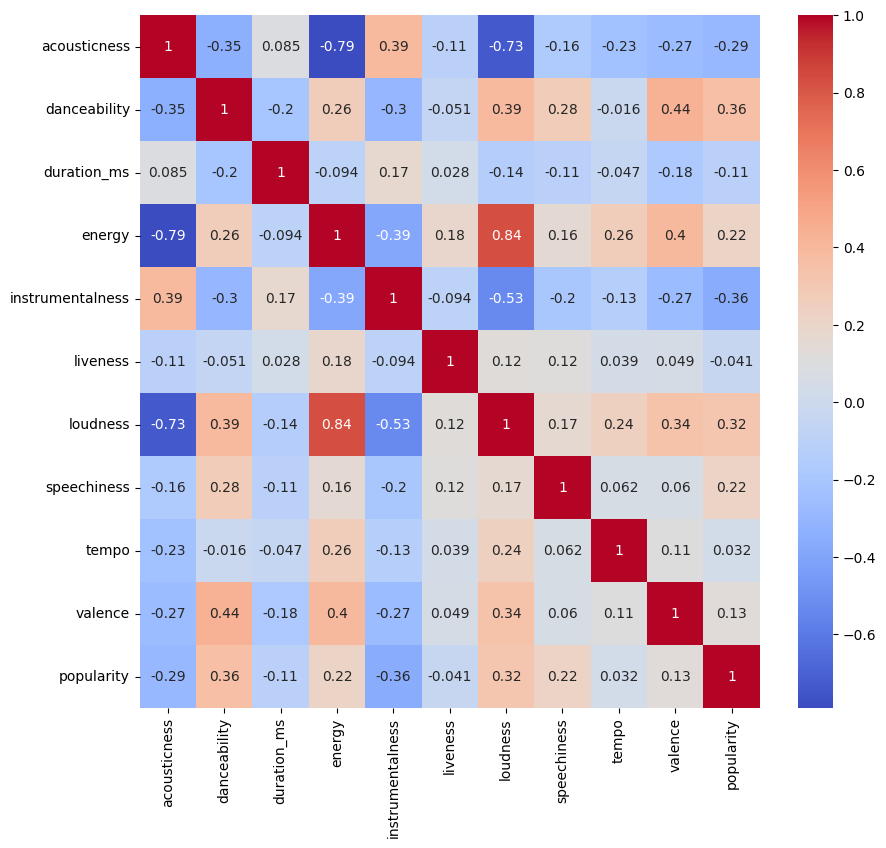

In [ ]:
# plt.subplots(figsize=(10,9))
# sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
# plt.show()

In [ ]:
x = data.loc[:,:"music_genre_Rock"]
y = data["popularity"]

In [ ]:
x

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,music_genre_Alternative,music_genre_Anime,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock
0,0.01270,0.622,218293.0,0.890,0.950000,0.124,-7.043,0.0300,115.002,0.531,...,0,0,0,0,0,1,0,0,0,0
1,0.00306,0.620,215613.0,0.755,0.011800,0.534,-4.617,0.0345,127.994,0.333,...,0,0,0,0,0,1,0,0,0,0
2,0.02540,0.774,166875.0,0.700,0.002530,0.157,-4.498,0.2390,128.014,0.270,...,0,0,0,0,0,1,0,0,0,0
3,0.00465,0.638,222369.0,0.587,0.909000,0.157,-6.266,0.0413,145.036,0.323,...,0,0,0,0,0,1,0,0,0,0
4,0.02890,0.572,214408.0,0.803,0.000008,0.106,-4.294,0.3510,149.995,0.230,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40555,0.13300,0.849,237667.0,0.660,0.000008,0.296,-7.195,0.0516,99.988,0.629,...,0,0,0,0,0,0,1,0,0,0
40556,0.15700,0.709,251860.0,0.362,0.000000,0.109,-9.814,0.0550,122.043,0.113,...,0,0,0,0,0,0,1,0,0,0
40557,0.00597,0.693,189483.0,0.763,0.000000,0.143,-5.443,0.1460,131.079,0.395,...,0,0,0,0,0,0,1,0,0,0
40558,0.08310,0.782,262773.0,0.472,0.000000,0.106,-5.016,0.0441,75.886,0.354,...,0,0,0,0,0,0,1,0,0,0


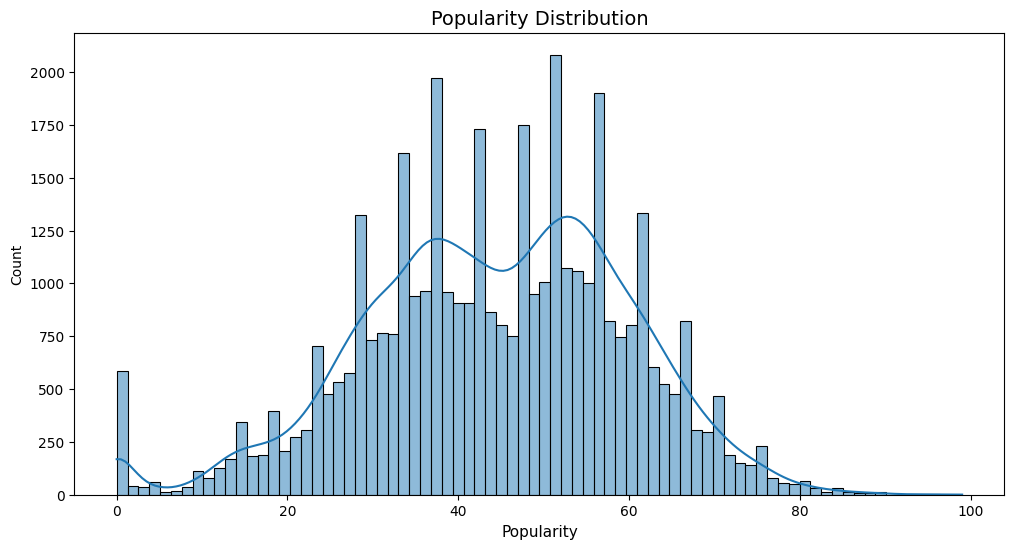

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(y, kde=True)
plt.xlabel('Popularity', fontsize=11)
plt.title('Popularity Distribution', fontsize=14)
plt.show()

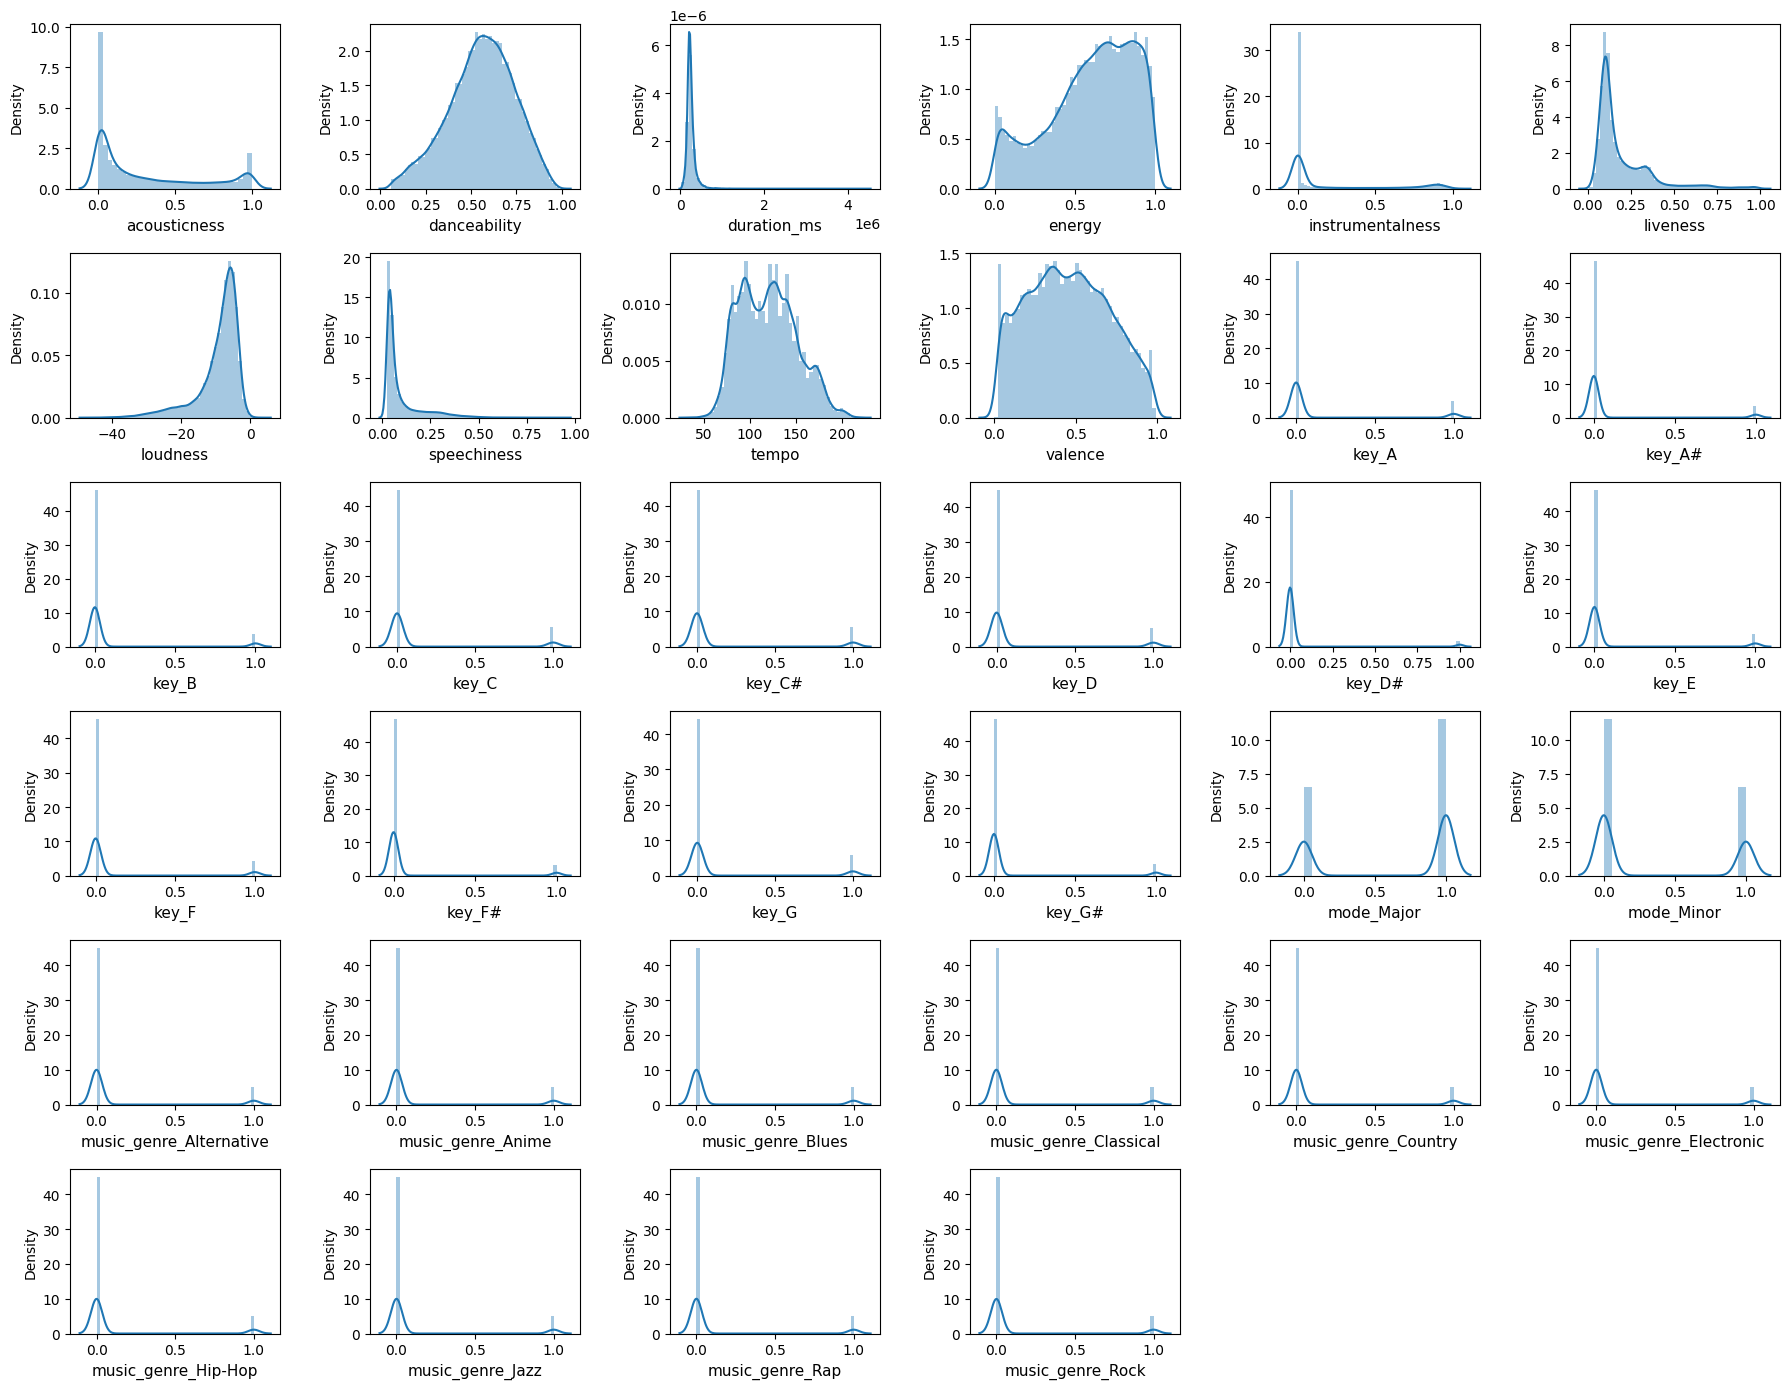

In [ ]:
num_columns = len(x.columns)
grid_size = int(math.ceil(math.sqrt(num_columns)))

k=0
plt.figure(figsize = (18,14))
for i in x.columns:
    plt.subplot(grid_size, grid_size, k + 1)
    sns.distplot(x[i])
    plt.xlabel(i, fontsize=11)
    k += 1

plt.tight_layout()  # Adjust subplot positions for a better layout
plt.show()

In [ ]:
def assign_class(value):
    if 0 <= value < 25:
        return 0
    elif 25 <= value < 50:
        return 1
    elif 50 <= value < 75:
        return 2
    elif 75 <= value <= 100:
        return 3

data['popularity_class'] = data['popularity'].apply(assign_class)
data.drop(columns=['popularity'], inplace=True)

In [ ]:
data

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,music_genre_Anime,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock,popularity_class
0,0.01270,0.622,218293.0,0.890,0.950000,0.124,-7.043,0.0300,115.002,0.531,...,0,0,0,0,1,0,0,0,0,1
1,0.00306,0.620,215613.0,0.755,0.011800,0.534,-4.617,0.0345,127.994,0.333,...,0,0,0,0,1,0,0,0,0,1
2,0.02540,0.774,166875.0,0.700,0.002530,0.157,-4.498,0.2390,128.014,0.270,...,0,0,0,0,1,0,0,0,0,1
3,0.00465,0.638,222369.0,0.587,0.909000,0.157,-6.266,0.0413,145.036,0.323,...,0,0,0,0,1,0,0,0,0,1
4,0.02890,0.572,214408.0,0.803,0.000008,0.106,-4.294,0.3510,149.995,0.230,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40555,0.13300,0.849,237667.0,0.660,0.000008,0.296,-7.195,0.0516,99.988,0.629,...,0,0,0,0,0,1,0,0,0,2
40556,0.15700,0.709,251860.0,0.362,0.000000,0.109,-9.814,0.0550,122.043,0.113,...,0,0,0,0,0,1,0,0,0,2
40557,0.00597,0.693,189483.0,0.763,0.000000,0.143,-5.443,0.1460,131.079,0.395,...,0,0,0,0,0,1,0,0,0,2
40558,0.08310,0.782,262773.0,0.472,0.000000,0.106,-5.016,0.0441,75.886,0.354,...,0,0,0,0,0,1,0,0,0,2


In [ ]:
x = data.loc[:,:"music_genre_Rock"]
y = data["popularity_class"]

In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
40555    2
40556    2
40557    2
40558    2
40559    2
Name: popularity_class, Length: 40560, dtype: int64

In [ ]:
y.describe()

count    40560.000000
mean         1.324211
std          0.663337
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: popularity_class, dtype: float64

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
test_size= 0.2, random_state=42, shuffle = True)

xtrain.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D',
       'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major',
       'mode_Minor', 'music_genre_Alternative', 'music_genre_Anime',
       'music_genre_Blues', 'music_genre_Classical', 'music_genre_Country',
       'music_genre_Electronic', 'music_genre_Hip-Hop', 'music_genre_Jazz',
       'music_genre_Rap', 'music_genre_Rock'],
      dtype='object')

In [ ]:
col = xtrain.columns
scalerx = MinMaxScaler()
xtrain = scalerx.fit_transform(xtrain)
xtest = scalerx.transform(xtest)
xtrain = pd.DataFrame(xtrain, columns = col)
xtest = pd.DataFrame(xtest, columns = col)

In [ ]:
xtrain.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,music_genre_Alternative,music_genre_Anime,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock
count,32448.000000,32448.000000,32448.000000,32448.000000,32448.000000,32448.000000,32448.000000,32448.000000,32448.000000,32448.000000,...,32448.000000,32448.000000,32448.000000,32448.000000,32448.000000,32448.000000,32448.000000,32448.000000,32448.000000,32448.000000
mean,0.308179,0.538153,0.051410,0.600146,0.181979,0.182940,0.773641,0.077910,0.459482,0.461507,...,0.100284,0.099760,0.100284,0.099082,0.100006,0.098280,0.100253,0.101146,0.100468,0.100438
std,0.342595,0.192605,0.024604,0.265151,0.326684,0.164011,0.125524,0.110653,0.164878,0.248680,...,0.300382,0.299684,0.300382,0.298776,0.300013,0.297698,0.300341,0.301527,0.300628,0.300587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020180,0.412527,0.039067,0.431980,0.000000,0.084550,0.738034,0.015054,0.325420,0.262097,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.147589,0.548596,0.047311,0.643360,0.000157,0.113950,0.811369,0.029126,0.457529,0.453629,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.553212,0.676026,0.058149,0.816671,0.149598,0.233577,0.854557,0.082688,0.569090,0.654234,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
xtest.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,music_genre_Alternative,music_genre_Anime,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock
count,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,...,8112.00000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000
mean,0.303296,0.538631,0.050893,0.602479,0.183743,0.181762,0.775180,0.078010,0.462078,0.457002,...,0.09825,0.101948,0.097633,0.101208,0.099112,0.103920,0.101578,0.096400,0.096400,0.103550
std,0.342003,0.194231,0.024416,0.264284,0.328365,0.162599,0.125995,0.111023,0.164808,0.249927,...,0.29767,0.302598,0.296836,0.301623,0.298831,0.305176,0.302111,0.295158,0.295158,0.304695
min,-0.000001,-0.000432,0.003239,-0.000003,0.000000,-0.003984,0.011001,0.000218,0.000656,0.024798,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.019577,0.413607,0.038911,0.437991,0.000000,0.084448,0.742958,0.014945,0.326112,0.257056,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.137549,0.551836,0.047241,0.646365,0.000162,0.113950,0.813195,0.028581,0.460617,0.445565,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.547439,0.679266,0.057670,0.817673,0.162902,0.232563,0.855011,0.084761,0.574569,0.648185,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.988121,0.950475,1.000000,0.988956,1.000000,1.036636,1.003273,0.994917,0.985887,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


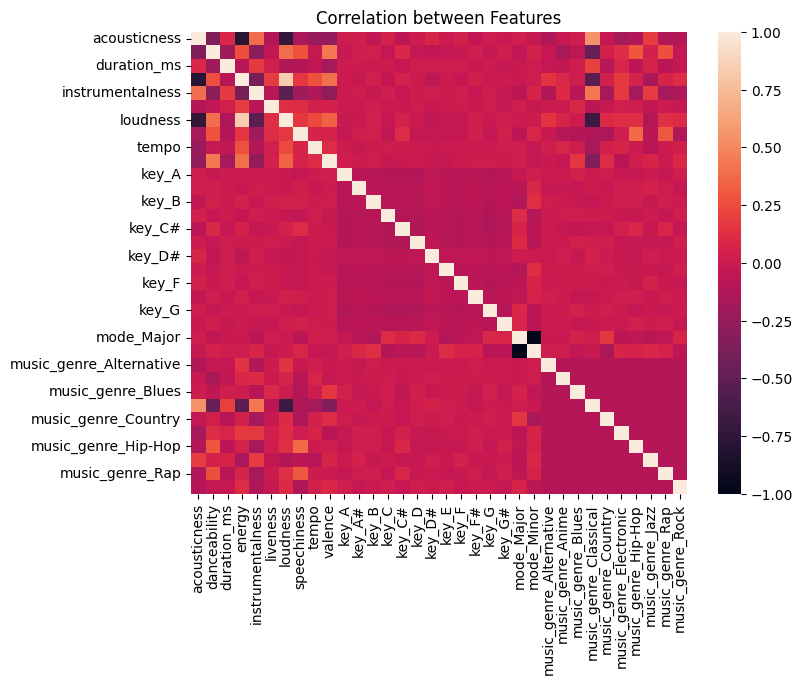

In [ ]:
le = preprocessing.LabelEncoder()

ytrain = le.fit_transform(ytrain)

ytest = le.transform(ytest)

x = pd.concat([xtrain, xtest], axis = 0)

y = pd.concat([pd.DataFrame(ytrain), pd.DataFrame(ytest)], axis = 0)

y_train = le.inverse_transform(ytrain)

y_test = le.inverse_transform(ytest)

y_org = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)], axis = 0)

np.unique(y_train)

plt.subplots(figsize=(8,6))

ax = sns.heatmap(xtrain.corr()).set(title = "Correlation between Features")

**Principal Component Analysis**

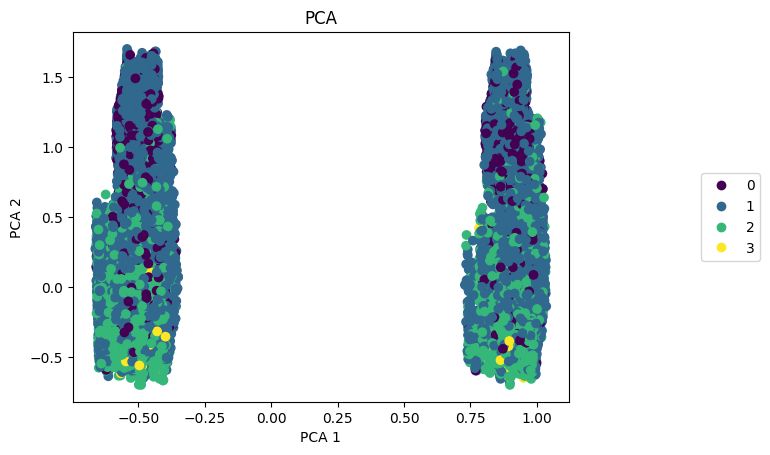

In [ ]:
# to reduce the dimensionality of the dataset 
# while retaining as much informatino as possible
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x, y)
plot_pca = plt.scatter(x_pca[:,0], x_pca[:,1], c=y)
handles, labels = plot_pca.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
_ = plt.title("PCA")

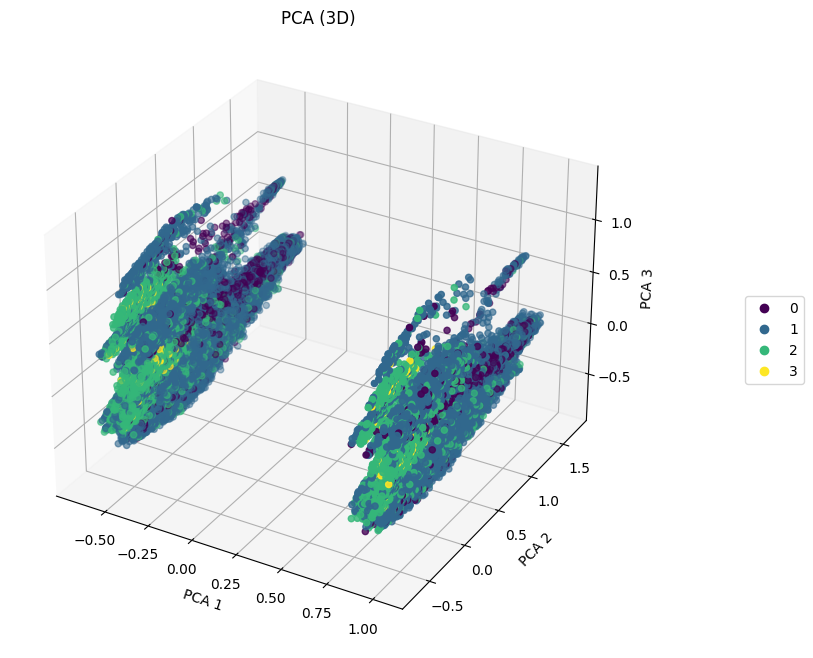

In [ ]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x, y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=y, cmap='viridis')

# Set axis labels
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

# Create a legend
handles, labels = scatter.legend_elements()
lg = ax.legend(handles, list(np.unique(y_org)), loc='center right', bbox_to_anchor=(1.3, 0.5))
ax.set_title("PCA (3D)")

plt.show()


**t-SNE**

In [ ]:
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x, y)
plot_tsne = plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y)
handles, labels = plot_tsne.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("T-SNE 1")
plt.ylabel("T-SNE 2")
_ = plt.title("T-SNE")

KeyboardInterrupt: ignored

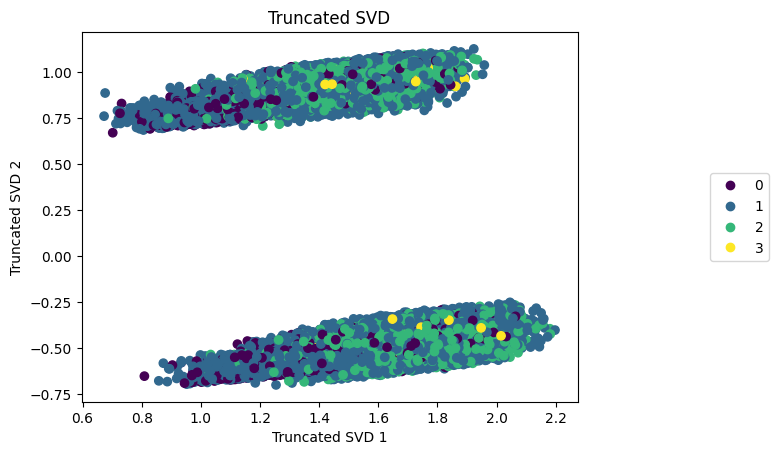

In [ ]:
svd = TruncatedSVD(n_components=2)
x_svd = svd.fit_transform(x, y)
plot_svd = plt.scatter(x_svd[:,0], x_svd[:,1], c=y)
handles, labels = plot_svd.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("Truncated SVD 1")
plt.ylabel("Truncated SVD 2")
_ = plt.title("Truncated SVD")

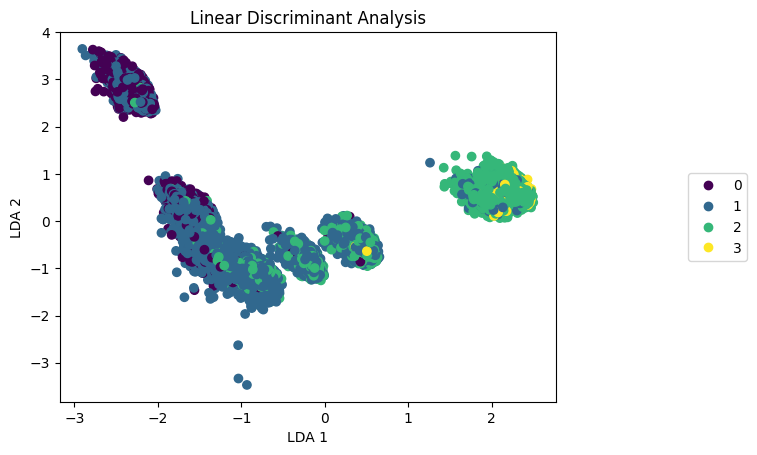

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
x_lda = lda.fit_transform(x, y.values.ravel())
plot_lda = plt.scatter(x_lda[:,0], x_lda[:,1], c=y)
handles, labels = plot_lda.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
_ = plt.title("Linear Discriminant Analysis")

In [ ]:
# def f1_metric(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

#     precision = true_positives / (predicted_positives + K.epsilon())
#     recall = true_positives / (possible_positives + K.epsilon())

#     f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
#     return f1_val

In [ ]:
def pairwise_ranking_loss(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    n_samples = y_true.shape[0]
    
    loss = 0
    for i in range(n_samples):
        true_label = y_true[i]
        true_score = y_pred[i][true_label]
        
        for j in range(n_classes):
            if j != true_label:
                loss += (y_pred[i][j] > true_score)
                
    loss /= (n_samples * (n_classes - 1))
    return loss

In [ ]:
def mean_reciprocal_rank(y_true, y_pred):
    n_samples = y_true.shape[0]
    
    # Calculate the ranks of true labels
    ranks = []
    for i in range(n_samples):
        true_label = y_true[i]
        true_score = y_pred[i][true_label]

        # Count the number of labels with a higher score than the true label
        rank = 1 + np.sum(y_pred[i] > true_score)
        ranks.append(rank)
    
    # Calculate the mean reciprocal rank
    mrr = np.mean(1.0 / np.array(ranks))
    return mrr


In [ ]:
xtrain = xtrain.to_numpy()
# ytrain = ytrain.to_numpy()


early_stopping1 = keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                               patience = 50, restore_best_weights = True)
early_stopping2 = keras.callbacks.EarlyStopping(monitor = "val_accuracy", 
                                               patience = 50, restore_best_weights = True)

def create_model(input_shape):
    model = keras.Sequential([
        keras.layers.Input(name="input", shape=input_shape),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(max(ytrain) + 1, activation="softmax"),
    ])
    return model


In [ ]:
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

fold_num = 1
for train_idx, val_idx in kfold.split(xtrain, ytrain):
  print(train_idx)
  x_train_fold, x_val_fold = xtrain[train_idx], xtrain[val_idx]
  y_train_fold, y_val_fold = ytrain[train_idx], ytrain[val_idx]

  model = create_model((xtrain.shape[1],))

  model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy", f1_metric])

  print(f"Training fold {fold_num}...")
  model_history = model.fit(xtrain, ytrain,
                          epochs=100,
                          verbose=1,
                          batch_size=128,
                          validation_data=(xtest, ytest),
                          callbacks=[early_stopping1, early_stopping2])
  y_pred = model.predict(xtest)
  y_pred_classes = np.argmax(y_pred, axis=1)

  # Compute the F1 score
  f1 = f1_score(ytest, y_pred_classes, average='weighted')
  print(f"F1 score: {f1}")

  # Calculate pairwise ranking loss
  ranking_loss = pairwise_ranking_loss(ytest, y_pred)
  print(f"Pairwise ranking loss: {ranking_loss}")

  ranking_score = mean_reciprocal_rank(ytest, y_pred)
  print(f"Mean reciprocal rank: {ranking_score}")

  fold_num += 1


[    0     1     2 ... 32444 32446 32447]
Training fold 1...
Epoch 1/100
254/254 [==============================] - 6s 15ms/step - loss: 0.7386 - accuracy: 0.7220 - f1_metric: 1.0440 - val_loss: 0.6895 - val_accuracy: 0.7467 - val_f1_metric: 1.2319
Epoch 2/100
254/254 [==============================] - 3s 10ms/step - loss: 0.5928 - accuracy: 0.7621 - f1_metric: 1.0384 - val_loss: 0.5953 - val_accuracy: 0.7612 - val_f1_metric: 1.0289
Epoch 3/100
254/254 [==============================] - 2s 8ms/step - loss: 0.5795 - accuracy: 0.7653 - f1_metric: 1.0401 - val_loss: 0.5897 - val_accuracy: 0.7611 - val_f1_metric: 1.0225
Epoch 4/100
254/254 [==============================] - 2s 8ms/step - loss: 0.5749 - accuracy: 0.7649 - f1_metric: 1.0387 - val_loss: 0.5902 - val_accuracy: 0.7601 - val_f1_metric: 1.0335
Epoch 5/100
254/254 [==============================] - 2s 8ms/step - loss: 0.5707 - accuracy: 0.7659 - f1_metric: 1.0397 - val_loss: 0.5820 - val_accuracy: 0.7634 - val_f1_metric: 1.0367
Ep

In [ ]:

# model_history = model.fit(xtrain, ytrain,
#                 epochs = 100,
#                 verbose = 1, batch_size = 128,
#                 validation_data = (xtest, ytest),
#                 callbacks = [early_stopping1, early_stopping2])

Epoch 1/100
254/254 [==============================] - 4s 9ms/step - loss: 0.6717 - accuracy: 0.7384 - val_loss: 0.7054 - val_accuracy: 0.7467
Epoch 2/100
254/254 [==============================] - 2s 8ms/step - loss: 0.5897 - accuracy: 0.7609 - val_loss: 0.5907 - val_accuracy: 0.7627
Epoch 3/100
254/254 [==============================] - 2s 8ms/step - loss: 0.5796 - accuracy: 0.7640 - val_loss: 0.5869 - val_accuracy: 0.7573
Epoch 4/100
254/254 [==============================] - 2s 8ms/step - loss: 0.5752 - accuracy: 0.7667 - val_loss: 0.5867 - val_accuracy: 0.7569
Epoch 5/100
254/254 [==============================] - 3s 11ms/step - loss: 0.5687 - accuracy: 0.7680 - val_loss: 0.5883 - val_accuracy: 0.7627
Epoch 6/100
254/254 [==============================] - 3s 12ms/step - loss: 0.5684 - accuracy: 0.7674 - val_loss: 0.5840 - val_accuracy: 0.7639
Epoch 7/100
254/254 [==============================] - 2s 8ms/step - loss: 0.5645 - accuracy: 0.7690 - val_loss: 0.5845 - val_accuracy: 0.76

In [ ]:
print(model.evaluate(xtrain, ytrain))
print(model.evaluate(xtest, ytest))

1014/1014 [==============================] - 2s 2ms/step - loss: 0.5448 - accuracy: 0.7762 - f1_metric: 1.0402
[0.5448154807090759, 0.7761649489402771, 1.0402451753616333]
254/254 [==============================] - 1s 2ms/step - loss: 0.5846 - accuracy: 0.7612 - f1_metric: 1.0312
[0.584581732749939, 0.7612179517745972, 1.0312268733978271]


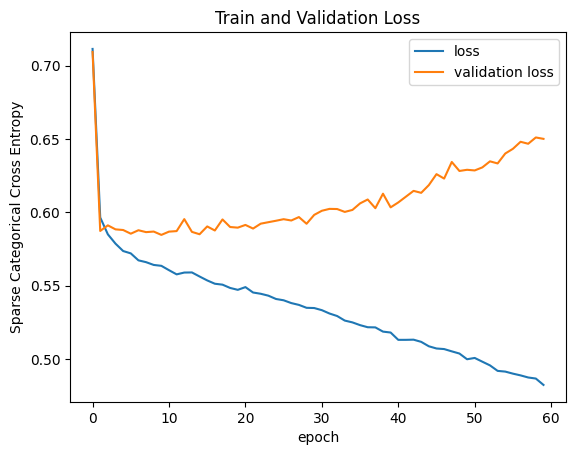

In [ ]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.legend(["loss", "validation loss"], loc ="upper right")
plt.title("Train and Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Sparse Categorical Cross Entropy")
plt.show()

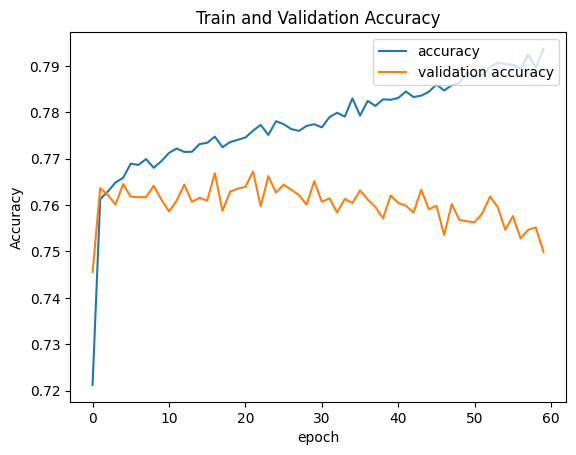

In [ ]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.legend(["accuracy", "validation accuracy"], loc ="upper right")
plt.title("Train and Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
ypred = model.predict(xtest).argmax(axis=1)

254/254 [==============================] - 0s 2ms/step


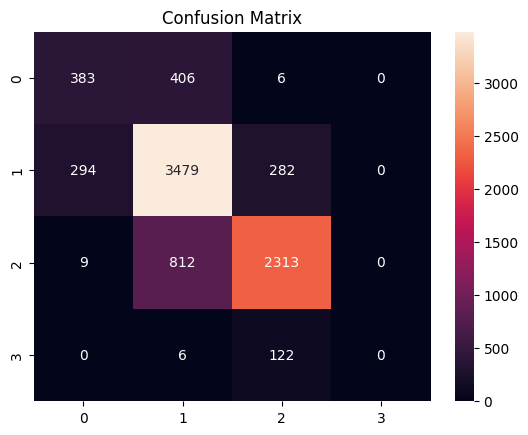

In [ ]:
cf_matrix = metrics.confusion_matrix(ytest, ypred)
_ = sns.heatmap(cf_matrix, fmt=".0f", annot=True)
_ = plt.title("Confusion Matrix")

In [ ]:
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.56      0.48      0.52       795
           1       0.74      0.86      0.79      4055
           2       0.85      0.74      0.79      3134
           3       0.00      0.00      0.00       128

    accuracy                           0.76      8112
   macro avg       0.54      0.52      0.53      8112
weighted avg       0.75      0.76      0.75      8112



In [ ]:
!pip install visualkeras
import visualkeras

model = keras.Sequential([
    keras.layers.Input(name = "input", shape = (xtrain.shape[1])),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(max(ytrain)+1, activation = "softmax")
])


visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
